# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [4]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io 

url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"}
response = requests.get(url, headers=headers)

print(response.status_code)
print(response.text)



200
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>List of Spotify streaming records - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-cont

In [5]:
import pandas as pd
html = io.StringIO(response.text)
tables = pd.read_html(html)

print(f"Number of tables: {len(tables)}")

Number of tables: 27


In [6]:
df = tables[0]

df.head()

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,5.059,29 November 2019,[1]
1,2,"""Shape of You""",Ed Sheeran,4.580,6 January 2017,[2]
2,3,"""Starboy""",The Weeknd and Daft Punk,4.127,21 September 2016,[3]
3,4,"""Someone You Loved""",Lewis Capaldi,4.076,8 November 2018,[4]
4,5,"""Sweater Weather""",The Neighbourhood,4.068,3 December 2012,[5]


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rank                101 non-null    object
 1   Song                101 non-null    object
 2   Artist(s)           101 non-null    object
 3   Streams (billions)  101 non-null    object
 4   Release date        101 non-null    object
 5   Ref.                99 non-null     object
dtypes: object(6)
memory usage: 4.9+ KB


In [8]:
df.drop(df.tail(1).index, inplace=True)
df['Streams (billions)'] = df['Streams (billions)'].astype(float)
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')
df['Rank'] = df['Rank'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rank                100 non-null    int64         
 1   Song                100 non-null    object        
 2   Artist(s)           100 non-null    object        
 3   Streams (billions)  100 non-null    float64       
 4   Release date        100 non-null    datetime64[ns]
 5   Ref.                98 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 4.8+ KB


In [9]:
conn = sqlite3.connect("spotify_canciones_mas_escuchadas.db")
df.to_sql("mas_reproducidas", conn, if_exists="replace", index=False)

100

In [10]:
cursor = conn.cursor()
cursor.execute("SELECT * From mas_reproducidas")
print(cursor.fetchone())
conn.commit()
conn.close()

(1, '"Blinding Lights"', 'The Weeknd', 5.059, '2019-11-29 00:00:00', '[1]')


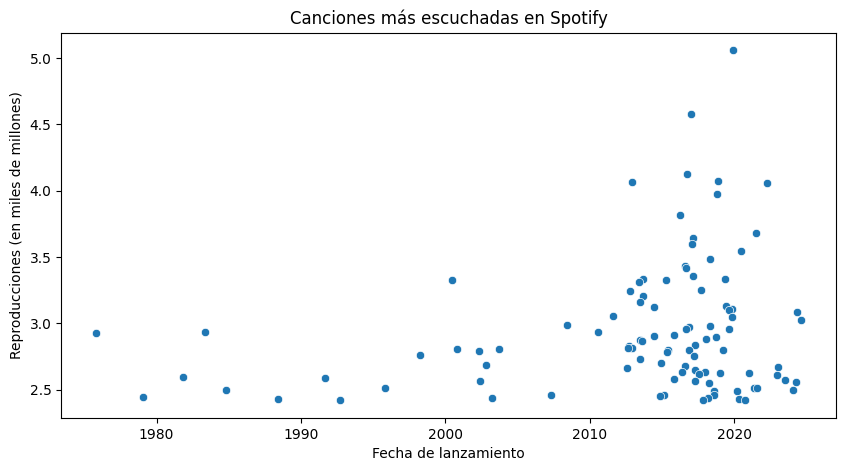

In [11]:
plt.figure(figsize=(10, 5))
sns.scatterplot(df, x = 'Release date', y = 'Streams (billions)')
plt.title('Canciones más escuchadas en Spotify') #no pude poner la n 
plt.xlabel("Fecha de lanzamiento")
plt.ylabel("Reproducciones (en miles de millones)")
plt.show()

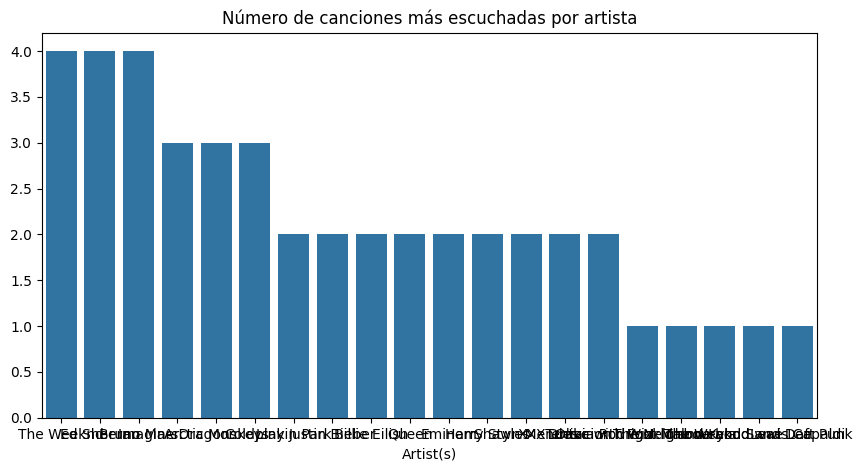

In [19]:
n_canciones_x_atistas = df["Artist(s)"].value_counts().nlargest(20)


plt.figure(figsize=(10, 5))
sns.barplot(y=n_canciones_x_atistas.values, x=n_canciones_x_atistas.index, )   
plt.title('Número de canciones más escuchadas por artista')
plt.show()

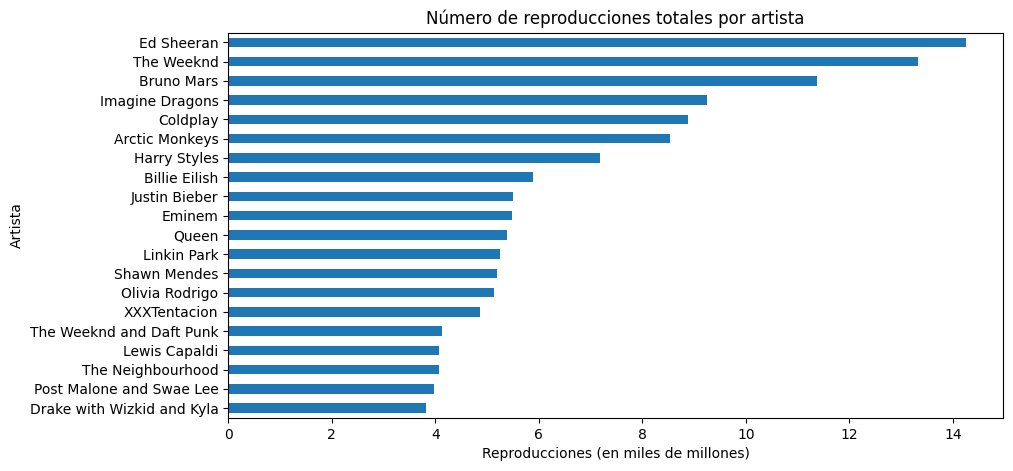

In [20]:
suma_reproducciones_x_artista = df.groupby(["Artist(s)"])["Streams (billions)"].sum().nlargest(20)
suma_reproducciones_x_artista.sort_values().plot(kind='barh', figsize=(10, 5))
plt.ylabel("Artista")
plt.title('Número de reproducciones totales por artista')
plt.xlabel("Reproducciones (en miles de millones)")
plt.show()
